In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy.physics.units import centimeter
from sympy.physics.units import convert_to
from sympy.physics.units import second
from sympy.physics.units import electronvolt
from sympy.physics.units import kelvin
from sympy.physics.units import watt
from sympy.physics.units import nanometer
from sympy.physics.units import meter

import lss

# Black Body (Planck) (Analytics)

In [2]:
B_lambda = sy.Symbol('B_\\lambda')
B_lambda_tot = sy.Symbol('B_\\lambda^{{(tot)}}')
c = sy.Symbol('c')
F = sy.Symbol('F')
F_lambda = sy.Symbol('F_\\lambda')
h = sy.Symbol('h')
k_B = sy.Symbol('k_B')
slambda = sy.Symbol('\\lambda')
T = sy.Symbol('T')

constants = {
    c: 2.99792458e10 * centimeter * second**(-1),
    F: 1367.0 * watt * meter**(-2), # Sun
    h: 4.135667696e-15 * electronvolt * second,
    k_B: 8.617333262e-5 * electronvolt * kelvin**(-1),
}

In [3]:
B_lambda_ = (
    + 2 * h * c**2
    / slambda**5
    / (sy.exp(h * c / (slambda * k_B * T)) - 1)
)
sy.Eq(B_lambda, B_lambda_)

Eq(B_\lambda, 2*c**2*h/(\lambda**5*(exp(c*h/(T*\lambda*k_B)) - 1)))

In [4]:
F_lambda_ = F * B_lambda / B_lambda_tot

F_lambda__ = lambda T_, slambda_, B_lambda_tot_: (
    convert_to(
        F_lambda_
            .subs(F_lambda, F_lambda_)
            .subs(B_lambda, B_lambda_)
            .subs(B_lambda_tot, B_lambda_tot_)
            .subs(constants)
            .subs(T, T_)
            .subs(slambda, slambda_ * nanometer)
            .simplify()
            .n(),
        watt * meter**(-2) * nanometer**(-1)
    ).coeff(watt * meter**(-2) * nanometer**(-1))
) * watt * meter**(-2) * nanometer**(-1)

sy.Eq(F_lambda, F_lambda_)

Eq(F_\lambda, B_\lambda*F/B_\lambda^{{(tot)}})

In [5]:
B_lambda_tot_ = sy.Integral(B_lambda, (slambda, 0, sy.oo))

def B_lambda_tot__(T_, lambda_0_=0.0, lambda_1_=1.0e3, count=int(1e3)):
    B_lambda__ = lambda slambda_: convert_to(
        B_lambda
            .subs(B_lambda, B_lambda_)
            .subs(constants)
            .subs(T, T_)
            .subs(slambda, slambda_ * nanometer)
            .n()
            .simplify(),
        watt * meter**(-2) * nanometer**(-1)
    ).coeff(watt * meter**(-2) * nanometer**(-1))

    lambdas = np.linspace(lambda_0_, lambda_1_, count)
    Bs = np.array([B_lambda__(l) for l in lambdas])

    return np.trapz(Bs, lambdas) * watt * meter**(-2)

sy.Eq(B_lambda_tot, B_lambda_tot_)

Eq(B_\lambda^{{(tot)}}, Integral(B_\lambda, (\lambda, 0, oo)))

In [6]:
T_ = 5778 * kelvin
sy.Eq(T, T_)

Eq(T, 5778*kelvin)

In [7]:
B_lambda_tot___ = B_lambda_tot__(T_, 250, 2500)
sy.Eq(B_lambda_tot, B_lambda_tot___)

Eq(B_\lambda^{{(tot)}}, 19230290.6761379*watt/meter**2)

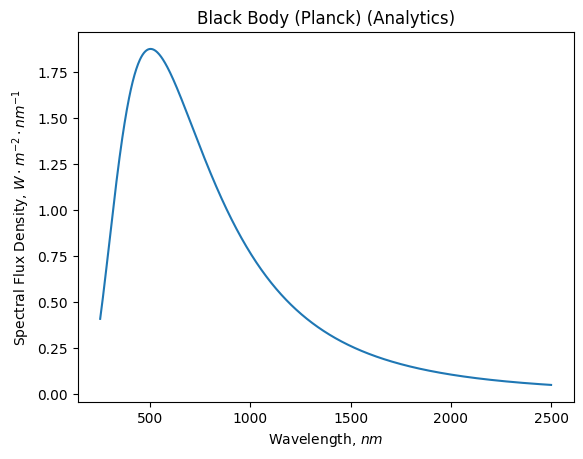

In [8]:
wavelengths = np.linspace(250, 2500, int(1e3))
spectral_flux_densities = (
    np.array([
        F_lambda__(T_, l, B_lambda_tot___)
            .coeff(watt * meter**(-2) * nanometer**(-1))
        for l in wavelengths
    ])
)

plt.plot(wavelengths, spectral_flux_densities)
plt.title('Black Body (Planck) (Analytics)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Spectral Flux Density, $W \cdot m^{{-2}} \cdot nm^{{-1}}$')
plt.show()

# Black Body (Planck) (Numeric)

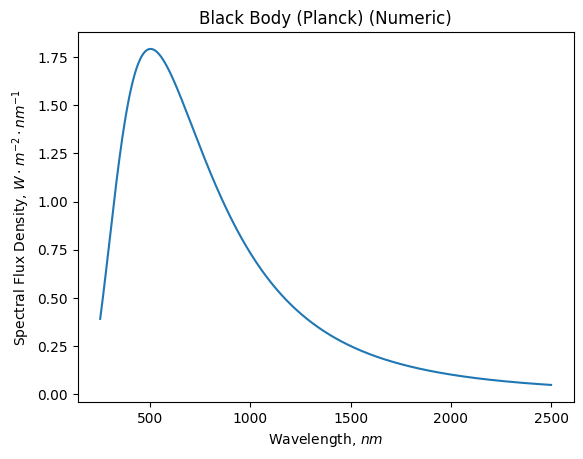

In [9]:
black_body = lss.BlackBodyPlanck()
black_body.temperature = 5778.0
black_body.total_area = 1367.0

# wavelengths = np.linspace(black_body.min_wavelength, 2500, int(1e3))
wavelengths = np.linspace(250, 2500, int(1e3))
spectral_flux_densities = np.array([black_body(l) for l in wavelengths])

plt.plot(wavelengths, spectral_flux_densities)
plt.title('Black Body (Planck) (Numeric)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Spectral Flux Density, $W \cdot m^{{-2}} \cdot nm^{{-1}}$')
plt.show()

# Sun (Gueymard)

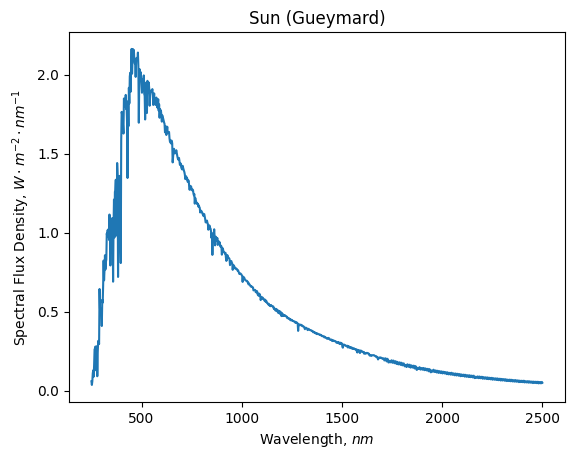

In [10]:
sun_gueymard = lss.SunGueymard()

# wavelengths = np.linspace(sun_gueymard.min_wavelength, sun_gueymard.max_wavelength, int(1e3))
wavelengths = np.linspace(250, 2500, int(1e3))
spectral_flux_densities = np.array([sun_gueymard(l) for l in wavelengths])

plt.plot(wavelengths, spectral_flux_densities)
plt.title('Sun (Gueymard)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Spectral Flux Density, $W \cdot m^{{-2}} \cdot nm^{{-1}}$')
plt.show()

del sun_gueymard

# Kelt 9 (Fossati)

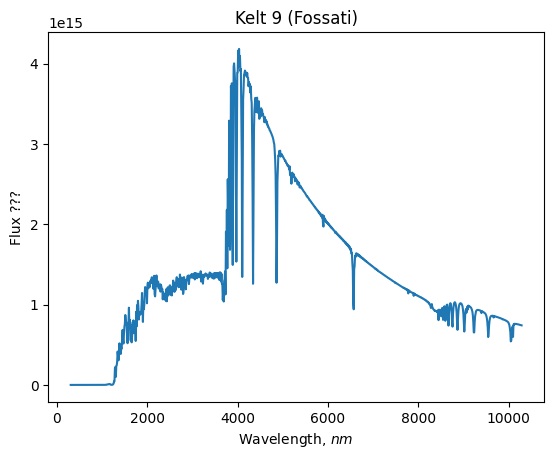

In [2]:
kelt_9_fossati = lss.Kelt9Fossati()

wavelengths = np.linspace(kelt_9_fossati.min_wavelength, kelt_9_fossati.max_wavelength, int(1e3))
spectral_flux_densities = np.array([kelt_9_fossati(l) for l in wavelengths])

plt.plot(wavelengths, spectral_flux_densities)
plt.title('Kelt 9 (Fossati)')
plt.xlabel('Wavelength, $nm$')
plt.ylabel('Flux ???')
plt.show()

del kelt_9_fossati